In [9]:
include("..\\Model_Reduction_Dev.jl")
include("..\\AnalysisToolbox_scratch_ckms.jl")

using LinearAlgebra
using PyPlot

function visual_test_ckms(P,l,nfft)
    d  = size(P,1)
    lp = size(P,3)
    ll = size(l,3)
    S_fun(z)    = P[:,:,1] + sum(P[:,:,i]*z^(-i+1) + P[:,:,i]'*z^(i-1) for i = 2:lp)
    S_fun_minus(z) = sum(l[:,:,i]*z^(-i+1) for i = 1:ll)
    S_fun_plus(z) = sum(l[:,:,i]'*z^(i-1) for i = 1:ll)

    Θ = 2π*(0:nfft-1)/nfft
    Z = exp.(im*Θ)
    S = complex(zeros(d,d,nfft))
    S_l = complex(zeros(d,d,nfft))
    for i = 1:nfft
        S[:,:,i] = S_fun(Z[i])
        S_l[:,:,i] = S_fun_minus(Z[i])*S_fun_plus(Z[i])
    end


    for i = 1:d
        for j = i:d
            plot(S[i,j,:], label = "S $i $j")
            plot(S_l[i,j,:], label = "S_l $i $j")
        end
    end
    legend()
end

visual_test_ckms (generic function with 1 method)

In [10]:
d = 3; m = 10
P = zeros(3,3,m)
for i = 1 : m
    b = randn(3,3)
    P[:,:,i] = b*b' + 1e-10*I
end

nfft = 10^4
l, Err = spectfact_matrix_CKMS_SC(P);

err : 0.014172894552886537 and 0.011959702461045097 and i : 100
err : 0.0006709976670512428 and 0.0007396744679094899 and i : 200
err : 5.345595898325756e-5 and 5.986561426280832e-5 and i : 300
err : 4.462213263188349e-6 and 4.993831212434728e-6 and i : 400
err : 3.7325144278536924e-7 and 4.177212175652949e-7 and i : 500
err : 3.1214110484023094e-8 and 3.49330636298389e-8 and i : 600
err : 2.610388820816611e-9 and 2.921398927106653e-9 and i : 700
err : 2.1830286561450374e-10 and 2.443121707489316e-10 and i : 800
i : 836


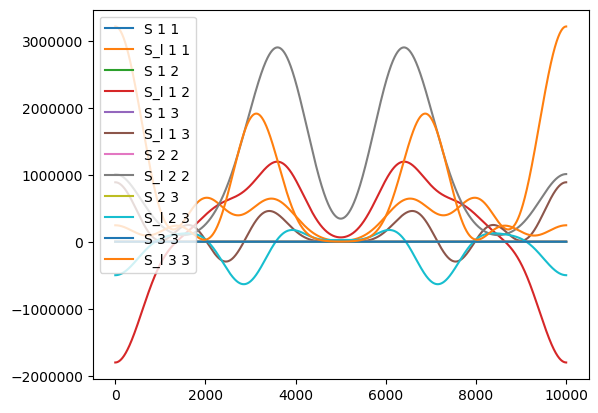

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject <matplotlib.legend.Legend object at 0x0000000043D64D48>

In [11]:
visual_test_ckms(P,l,nfft)